## Observations and Insights 

In [295]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [296]:
# Checking the number of mice.
num_of_mice = len(combined_mouse_data['Mouse ID'].value_counts())
num_of_mice

249

In [297]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_data = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [298]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data_df = pd.DataFrame(dup_mouse_data)
dup_mouse_data_df

,0
0,g989


In [299]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_df = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(dup_mouse_data)==False]
#clean_mouse_data_df = combined_mouse_data.drop_duplicates(subset="Mouse ID")
clean_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [300]:
# Checking the number of mice in the clean DataFrame.
num_of_mice2 = len(clean_mouse_data_df['Mouse ID'].value_counts())
num_of_mice2

248

## Summary Statistics

In [301]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_mouse_data_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_mouse_data_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = clean_mouse_data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stddev = clean_mouse_data_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_mouse_data_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

mean
median
var
stddev
sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [302]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_stat_table = pd.DataFrame({
    "Mean": mean, "Median": median, "Variance": var, "Standard Deviation": stddev, "SEM": sem
})
#sum_stat_table
# Using the aggregation method, produce the same summary statistics in a single line
sum_stat_table2 = clean_mouse_data_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
sum_stat_table2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

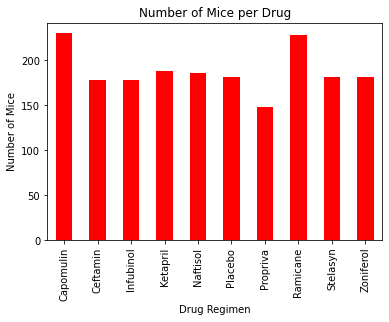

<Figure size 432x288 with 0 Axes>

In [303]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_per_drug = clean_mouse_data_df.groupby("Drug Regimen").count()["Mouse ID"]
pandas_bar = count_per_drug.plot(kind='bar', color='red')
plt.title("Number of Mice per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
pandas_bar

plt.show()
plt.tight_layout()
plt.savefig("Images/mice_on_each_drug.png")

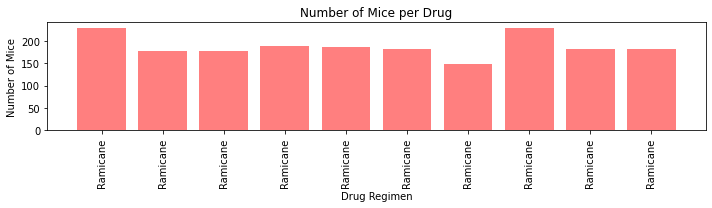

In [304]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(count_per_drug))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,3))
plt.bar(x_axis, count_per_drug, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, clean_mouse_data_df["Drug Regimen"], rotation="vertical")

# Set a Title and labels
plt.title("Number of Mice per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()
plt.savefig("Images/mice_per_drug.png")
plt.show()

Text(0.5, 1.0, 'Percentage of Sex in Study')

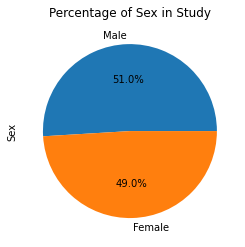

In [307]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Create df with sex count and percent
#groupby_sex = clean_mouse_data_df.groupby(["Mouse ID","Sex"])
#sex_df = pd.DataFrame(groupby_sex.size())
#sex_df
#sex_count_df = sex_df.groupby(["Sex"]).count()
#sex_count_df.columns = ["Total Count"]
#perc_of_sex = (sex_count / num_of_mice2)
#sex_count_df
data = clean_mouse_data_df['Sex'].value_counts()
data.plot(kind="pie", labels=data.index.values, autopct="%1.1f%%")
plt.title('Percentage of Sex in Study')

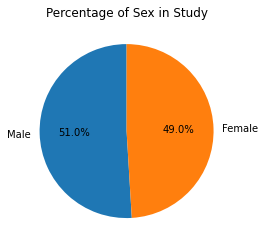

In [266]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = clean_mouse_data_df['Sex'].value_counts()
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Percentage of Sex in Study')
plt.show()


## Quartiles, Outliers and Boxplots

In [311]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
groupby_drug_df = reduced_df.groupby(["Drug Regimen"])
groupby_drug_df.count()
capomulin_df = groupby_drug_df.get_group("Capomulin")
capomulin_df

ramicane_df = groupby_drug_df.get_group("Ramicane")
ramicane_df

infubinol_df = groupby_drug_df.get_group("Infubinol")
infubinol_df

ceftamin_df = groupby_drug_df.get_group("Ceftamin")
ceftamin_df
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3)
484,a275,Ceftamin,28,0,45.000000
485,a275,Ceftamin,28,5,46.795257
486,a275,Ceftamin,28,10,47.371343
487,a275,Ceftamin,28,15,49.734404
488,a275,Ceftamin,28,20,50.513437
...,...,...,...,...,...
1851,y865,Ceftamin,26,25,57.173538
1852,y865,Ceftamin,26,30,59.033275
1853,y865,Ceftamin,26,35,61.153140
1854,y865,Ceftamin,26,40,63.469549


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [325]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_df = capomulin_df[capomulin_df["Mouse ID"].isin(["s185"])]
s185_df

tumor_vs_time_df = s185_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tumor_vs_time_df

lines = tumor_vs_ti.plot.line()

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
